In [1]:
from datasets import load_dataset
from mltb2.transformers import TransformersTokenCounter
from mltb2.text import clean_all_invisible_chars_and_strip
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

In [2]:
df = load_dataset("HuggingFaceH4/ultrachat_200k", split="train_sft").to_pandas()
df

,prompt,prompt_id,messages
0,These instructions apply to section-based them...,f0e37e9f7800261167ce91143f98f511f768847236f133...,[{'content': 'These instructions apply to sect...
1,Which famous landmarks should I visit in Londo...,f5025bdcae61bb77fd98a4d6cd6ba8e0199a098cfebcf6...,[{'content': 'Which famous landmarks should I ...
2,Write a comprehensive blog post of at least 10...,6db663a4d2671b41e0038c43c39f79cf909b10987dc595...,[{'content': 'Write a comprehensive blog post ...
3,"De León, previewing the speech he will give to...",dd1afba7d2151b0695edea838378c8fd086d538e62a664...,"[{'content': 'De León, previewing the speech h..."
4,Write an essay that evaluates the positive and...,cbf683405d8fe0221a42560cec50307d5fa9efa160c49d...,[{'content': 'Write an essay that evaluates th...
...,...,...,...
207860,Write a 5-7 page short story in third person l...,fd3a9ed1ee16d8176e3f167736c73343ddcb189f2a7031...,[{'content': 'Write a 5-7 page short story in ...
207861,Write a natural-sounding dialogue between two ...,46a85cc36ff5a8163c2257451429016e87b2edd06e6e68...,[{'content': 'Write a natural-sounding dialogu...
207862,Write instructions on how to make a delicious ...,8a13da55a823643c698b5b994b5785aa2c2ba1b342a788...,[{'content': 'Write instructions on how to mak...
207863,Write a heartfelt letter to a family member wh...,d53bc2fd53862f179a92d20eb8502850f97bf8d0712128...,[{'content': 'Write a heartfelt letter to a fa...


In [3]:
# are there duplicates in prompt_id
df["prompt_id"].duplicated().sum()

0

In [4]:
df.iloc[0]["messages"]

array([{'content': "These instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme's built-in settings!\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?", 'role': 'user'},
       {'content': 'This feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.', 'role': 'assistant'},
       {'content': 'Can you guide me through the process of enabling the secondary image hover feature on my Collection pages and Featured Collections sections?', 'role': 'user'},
       {'content

In [5]:
def check_messages(messages: list):
    for i, message in enumerate(messages):
        assert "content" in message
        assert "role" in message
        assert message["role"] in ["user", "assistant"]
        if i % 2 == 0:
            assert message["role"] == "user"
        else:
            assert message["role"] == "assistant"
        assert len(message) == 2
    assert len(messages) % 2 == 0

_ = df["messages"].apply(check_messages)

In [6]:
# convert format
# {"conversations": [{"from": "...", "value": "..."}]}
# from is human/gpt

def convert_messages_to_conversations(messages: list):
    conversations = []
    for message in messages:
        content = clean_all_invisible_chars_and_strip(message["content"])
        if len(content) == 0:
            return None
        if message["role"] == "user":
            conversations.append({"from": "human", "value": content})
        elif message["role"] == "assistant":
            conversations.append({"from": "gpt", "value": content})
        else:
            assert False, "Must not happen!"
    assert len(conversations) % 2 == 0
    return conversations

df["conversations"] = df["messages"].apply(convert_messages_to_conversations)
df


,prompt,prompt_id,messages,conversations
0,These instructions apply to section-based them...,f0e37e9f7800261167ce91143f98f511f768847236f133...,[{'content': 'These instructions apply to sect...,"[{'from': 'human', 'value': 'These instruction..."
1,Which famous landmarks should I visit in Londo...,f5025bdcae61bb77fd98a4d6cd6ba8e0199a098cfebcf6...,[{'content': 'Which famous landmarks should I ...,"[{'from': 'human', 'value': 'Which famous land..."
2,Write a comprehensive blog post of at least 10...,6db663a4d2671b41e0038c43c39f79cf909b10987dc595...,[{'content': 'Write a comprehensive blog post ...,"[{'from': 'human', 'value': 'Write a comprehen..."
3,"De León, previewing the speech he will give to...",dd1afba7d2151b0695edea838378c8fd086d538e62a664...,"[{'content': 'De León, previewing the speech h...","[{'from': 'human', 'value': 'De León, previewi..."
4,Write an essay that evaluates the positive and...,cbf683405d8fe0221a42560cec50307d5fa9efa160c49d...,[{'content': 'Write an essay that evaluates th...,"[{'from': 'human', 'value': 'Write an essay th..."
...,...,...,...,...
207860,Write a 5-7 page short story in third person l...,fd3a9ed1ee16d8176e3f167736c73343ddcb189f2a7031...,[{'content': 'Write a 5-7 page short story in ...,"[{'from': 'human', 'value': 'Write a 5-7 page ..."
207861,Write a natural-sounding dialogue between two ...,46a85cc36ff5a8163c2257451429016e87b2edd06e6e68...,[{'content': 'Write a natural-sounding dialogu...,"[{'from': 'human', 'value': 'Write a natural-s..."
207862,Write instructions on how to make a delicious ...,8a13da55a823643c698b5b994b5785aa2c2ba1b342a788...,[{'content': 'Write instructions on how to mak...,"[{'from': 'human', 'value': 'Write instruction..."
207863,Write a heartfelt letter to a family member wh...,d53bc2fd53862f179a92d20eb8502850f97bf8d0712128...,[{'content': 'Write a heartfelt letter to a fa...,"[{'from': 'human', 'value': 'Write a heartfelt..."


In [7]:
df = df[df["conversations"].notnull()].copy()
df

,prompt,prompt_id,messages,conversations
0,These instructions apply to section-based them...,f0e37e9f7800261167ce91143f98f511f768847236f133...,[{'content': 'These instructions apply to sect...,"[{'from': 'human', 'value': 'These instruction..."
1,Which famous landmarks should I visit in Londo...,f5025bdcae61bb77fd98a4d6cd6ba8e0199a098cfebcf6...,[{'content': 'Which famous landmarks should I ...,"[{'from': 'human', 'value': 'Which famous land..."
2,Write a comprehensive blog post of at least 10...,6db663a4d2671b41e0038c43c39f79cf909b10987dc595...,[{'content': 'Write a comprehensive blog post ...,"[{'from': 'human', 'value': 'Write a comprehen..."
3,"De León, previewing the speech he will give to...",dd1afba7d2151b0695edea838378c8fd086d538e62a664...,"[{'content': 'De León, previewing the speech h...","[{'from': 'human', 'value': 'De León, previewi..."
4,Write an essay that evaluates the positive and...,cbf683405d8fe0221a42560cec50307d5fa9efa160c49d...,[{'content': 'Write an essay that evaluates th...,"[{'from': 'human', 'value': 'Write an essay th..."
...,...,...,...,...
207860,Write a 5-7 page short story in third person l...,fd3a9ed1ee16d8176e3f167736c73343ddcb189f2a7031...,[{'content': 'Write a 5-7 page short story in ...,"[{'from': 'human', 'value': 'Write a 5-7 page ..."
207861,Write a natural-sounding dialogue between two ...,46a85cc36ff5a8163c2257451429016e87b2edd06e6e68...,[{'content': 'Write a natural-sounding dialogu...,"[{'from': 'human', 'value': 'Write a natural-s..."
207862,Write instructions on how to make a delicious ...,8a13da55a823643c698b5b994b5785aa2c2ba1b342a788...,[{'content': 'Write instructions on how to mak...,"[{'from': 'human', 'value': 'Write instruction..."
207863,Write a heartfelt letter to a family member wh...,d53bc2fd53862f179a92d20eb8502850f97bf8d0712128...,[{'content': 'Write a heartfelt letter to a fa...,"[{'from': 'human', 'value': 'Write a heartfelt..."


In [8]:
df.drop("prompt", axis=1, inplace=True)
df.drop("messages", axis=1, inplace=True)
df

,prompt_id,conversations
0,f0e37e9f7800261167ce91143f98f511f768847236f133...,"[{'from': 'human', 'value': 'These instruction..."
1,f5025bdcae61bb77fd98a4d6cd6ba8e0199a098cfebcf6...,"[{'from': 'human', 'value': 'Which famous land..."
2,6db663a4d2671b41e0038c43c39f79cf909b10987dc595...,"[{'from': 'human', 'value': 'Write a comprehen..."
3,dd1afba7d2151b0695edea838378c8fd086d538e62a664...,"[{'from': 'human', 'value': 'De León, previewi..."
4,cbf683405d8fe0221a42560cec50307d5fa9efa160c49d...,"[{'from': 'human', 'value': 'Write an essay th..."
...,...,...
207860,fd3a9ed1ee16d8176e3f167736c73343ddcb189f2a7031...,"[{'from': 'human', 'value': 'Write a 5-7 page ..."
207861,46a85cc36ff5a8163c2257451429016e87b2edd06e6e68...,"[{'from': 'human', 'value': 'Write a natural-s..."
207862,8a13da55a823643c698b5b994b5785aa2c2ba1b342a788...,"[{'from': 'human', 'value': 'Write instruction..."
207863,d53bc2fd53862f179a92d20eb8502850f97bf8d0712128...,"[{'from': 'human', 'value': 'Write a heartfelt..."


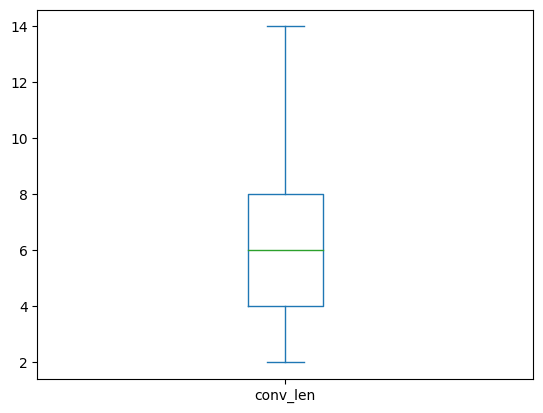

In [9]:
df["conv_len"] = df["conversations"].apply(len)

# box plot of conversation length
_ = df["conv_len"].plot.box()

In [10]:
transformers_token_counter = TransformersTokenCounter("TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T")

def count_tokens(conversations: list):
    total_tokens = 0
    for conversation in conversations:
        total_tokens += transformers_token_counter(conversation["value"])
    return total_tokens

df["token_count"] = df["conversations"].progress_apply(count_tokens)

100%|██████████| 207834/207834 [07:03<00:00, 490.19it/s]


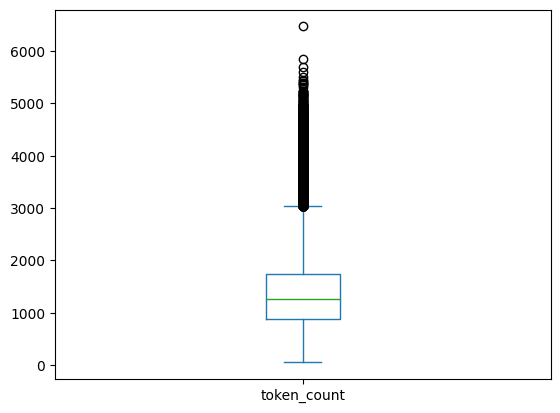

In [11]:
# box plot of token_count
_ = df["token_count"].plot.box()

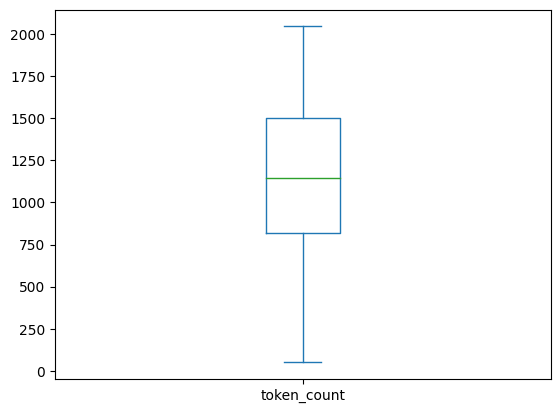

In [12]:
df = df[df["token_count"] <= 2048].copy()
_ = df["token_count"].plot.box()

In [13]:
df.drop("conv_len", axis=1, inplace=True)
df.drop("token_count", axis=1, inplace=True)
df

,prompt_id,conversations
0,f0e37e9f7800261167ce91143f98f511f768847236f133...,"[{'from': 'human', 'value': 'These instruction..."
1,f5025bdcae61bb77fd98a4d6cd6ba8e0199a098cfebcf6...,"[{'from': 'human', 'value': 'Which famous land..."
3,dd1afba7d2151b0695edea838378c8fd086d538e62a664...,"[{'from': 'human', 'value': 'De León, previewi..."
5,e4fefd659416848d028ccfa3a87a7f530887c588feface...,"[{'from': 'human', 'value': 'What many compani..."
6,b6c4eb83a6629ffd727a9b50a469062283b44c82d70084...,"[{'from': 'human', 'value': 'Write a Python pr..."
...,...,...
207859,a4f7f716ab634d1d3a0d9a50590c37e8dac61bda11d9e3...,"[{'from': 'human', 'value': 'Write detailed in..."
207861,46a85cc36ff5a8163c2257451429016e87b2edd06e6e68...,"[{'from': 'human', 'value': 'Write a natural-s..."
207862,8a13da55a823643c698b5b994b5785aa2c2ba1b342a788...,"[{'from': 'human', 'value': 'Write instruction..."
207863,d53bc2fd53862f179a92d20eb8502850f97bf8d0712128...,"[{'from': 'human', 'value': 'Write a heartfelt..."


In [14]:
df.to_parquet("./data/ultrachat_200k_convert_2048.parquet", compression="gzip", index=False)